In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv

In [77]:
f = np.vectorize(lambda x: x**2)

**Example of a long steep $\alpha^k$**

<IPython.core.display.Javascript object>


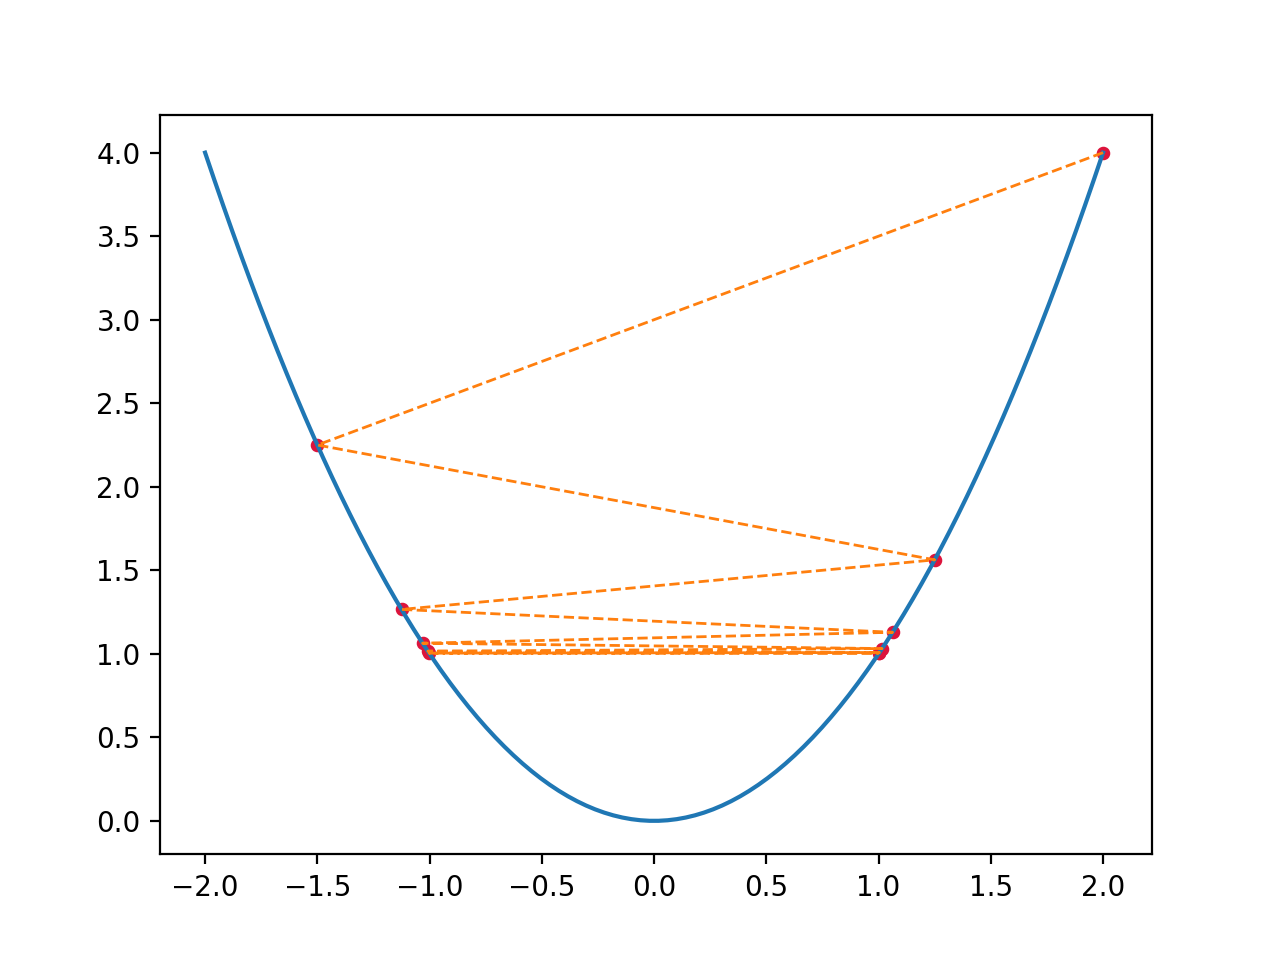

In [79]:
alpha_k = lambda k: 2 + 3 / 2 ** (k + 1)
d_k = lambda k: (-1) ** (k + 1)

xk = 2
Xks = [xk]
Fks = [f(xk)] 

for k in range(0, 10):
    xk += alpha_k(k) * d_k(k)
    Xks.append(xk); Fks.append(f(Xks))

xplot = np.linspace(-2, 2, 100)
plt.plot(xplot, f(xplot))
plt.scatter(Xks, f(Xks), s=15, c="crimson")
plt.plot(Xks, f(Xks), linewidth=1, linestyle="--");

**Example of a long of gradient descent with $\alpha^k$ chosen arbitrarily**

<IPython.core.display.Javascript object>


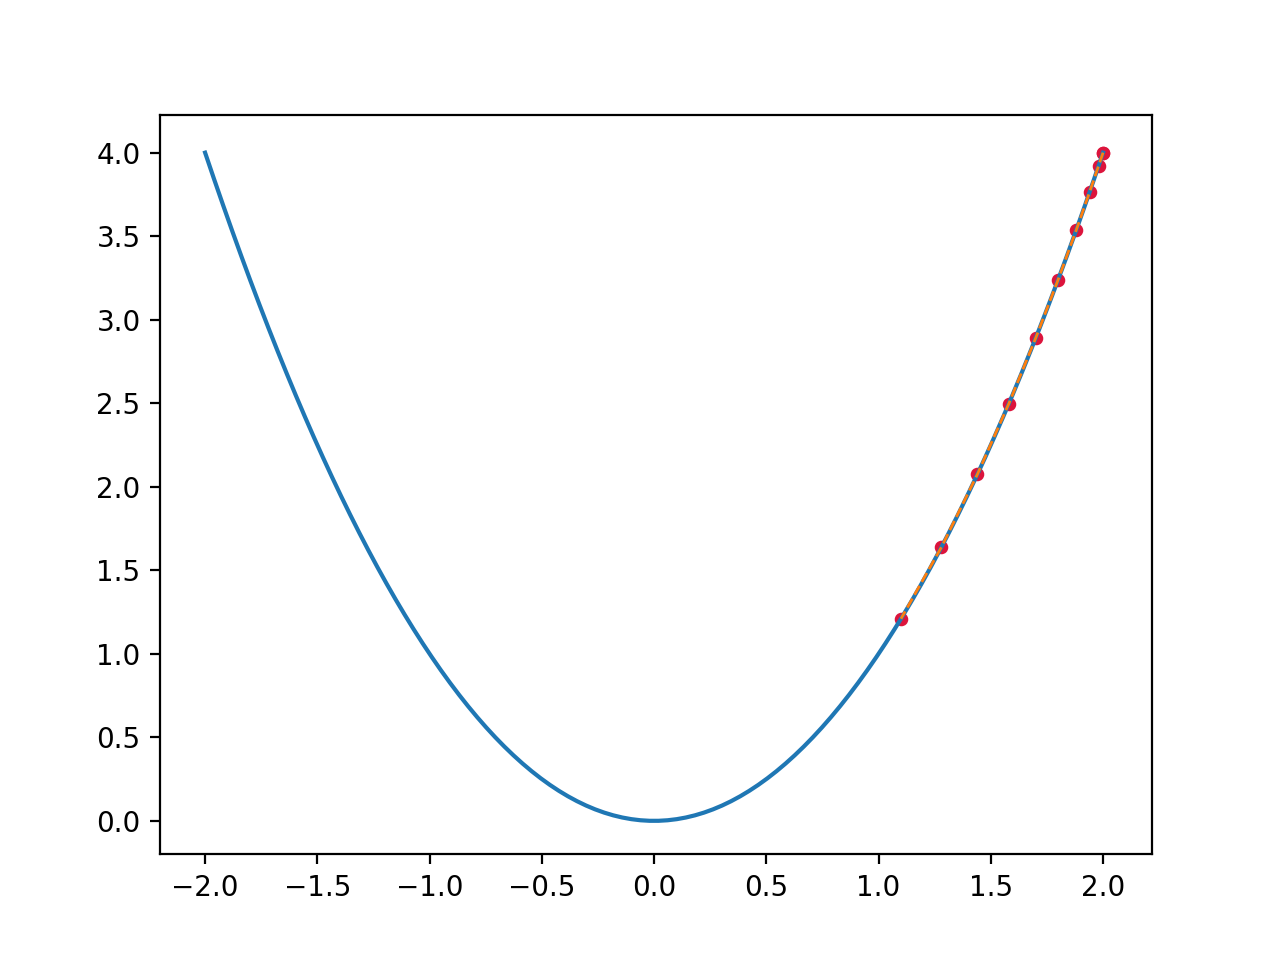

In [93]:
alpha_k = lambda k: -1/100
d_k = lambda k: 2*k

xk = 2
Xks = [xk]
Fks = [f(xk)] 

for k in range(0, 10):
    xk += alpha_k(k) * d_k(k)
    Xks.append(xk); Fks.append(f(Xks))

xplot = np.linspace(-2, 2, 100)
plt.plot(xplot, f(xplot))
plt.scatter(Xks, f(Xks), s=15, c="crimson")
plt.plot(Xks, f(Xks), linewidth=1, linestyle="--")

## Armijo condition
$$
    f(x_k + \alpha_kd_k) \leq f(x_k) + \alpha_k\beta(\nabla f_k)^Td
$$

In [220]:
f = lambda x, y: 3 * x ** 2 + y ** 4
gradf = lambda x, y: np.array((6 * x, 4 * y ** 3))

x0 = np.array((1, -2))
# MOVE TAU
tau = 0.5
beta = 0.1
alpha = 1

In [212]:
# Left and right Armijo's condition
while True:
    a_left = f(*(x0 - alpha * gradf(*x0)))
    a_right = f(*x0) + beta * alpha * np.dot(gradf(*x0),gradf(*x0))
    print(a_left, a_right)
    if a_left <= a_right:
        break
    else:
        alpha *= tau

810075 125.0
38428.0 72.0
1296.75 45.5
16.1875 32.25


### Newton-Armijo 

In [202]:
fxx = lambda x, y: 6
fyy = lambda x, y: 12 * y ** 2
fxy = lambda x, y: 0

hess = np.array([
    [fxx(*x0), fxy(*x0)],
    [fxy(*x0), fyy(*x0)]
])

In [221]:
newt = np.dot(inv(np.dot(hess, hess)), gradf(*x0))

alpha = 1
while True:
    a_left = f(*(x0 - alpha * newt))
    a_right = f(*x0) + beta * alpha * np.dot(gradf(*x0),newt)
    print(a_left, a_right)
    if a_left <= a_right:
        break
    else:
        alpha *= tau

17.6434971223 19.1444444444
